# **Data Pre-processing**

### **Import Libraries**

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, silhouette_samples, silhouette_score, adjusted_rand_score, accuracy_score, precision_score, recall_score, f1_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.manifold import TSNE
from sklearn.model_selection import GridSearchCV

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from pandas.plotting import parallel_coordinates
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import Circle, Ellipse

import numpy as np
import pandas as pd
import random

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Load Dataset**

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Dataset/Global_cleaned.csv')
data.head()

,X,Seq,Dur,RunTime,Mean,Sum,Min,Max,sTos,dTos,...,DstRate,SrcWin,DstWin,SrcTCPBase,DstTCPBase,TcpRtt,SynAck,AckDat,UniqueID,slice Type
0,34393.0,24.0,0.133023,0.133023,0.133023,0.133023,0.133023,0.133023,0.0,0.0,...,30.069990,1635.0,879.0,3.278968e+09,4.135953e+09,0.000000,0.000000,0.000000,247547.0,3
1,727022.0,250.0,0.001092,0.001092,0.001092,0.001092,0.001092,0.001092,0.0,0.0,...,0.000000,68096.0,31104.0,6.108380e+08,1.659091e+09,0.079877,0.041040,0.038837,350131.0,3
2,693697.0,1959.0,0.014081,0.014081,0.014081,0.014081,0.014081,0.014081,0.0,0.0,...,71.017685,97792.0,31104.0,3.649189e+09,1.482432e+09,0.012972,0.000953,0.012019,100319.0,3
3,22844.0,14.0,0.132893,0.132893,0.132893,0.132893,0.132893,0.132893,0.0,0.0,...,30.099403,1751.0,947.0,1.882601e+08,4.396569e+08,0.000000,0.000000,0.000000,231497.0,3
4,36309.0,7.0,3.521330,3.521330,3.521330,3.521330,3.521330,3.521330,0.0,0.0,...,7.099590,4094.0,5549.0,1.094324e+09,3.441728e+09,0.000000,0.000000,0.000000,197655.0,3


In [4]:
data_backup = data
data_backup

,X,Seq,Dur,RunTime,Mean,Sum,Min,Max,sTos,dTos,...,DstRate,SrcWin,DstWin,SrcTCPBase,DstTCPBase,TcpRtt,SynAck,AckDat,UniqueID,slice Type
0,34393.000000,24.000000,0.133023,0.133023,0.133023,0.133023,0.133023,0.133023,0.0,0.0,...,30.069990,1635.0,879.0,3.278968e+09,4.135953e+09,0.000000,0.000000,0.000000,2.475470e+05,3
1,727022.000000,250.000000,0.001092,0.001092,0.001092,0.001092,0.001092,0.001092,0.0,0.0,...,0.000000,68096.0,31104.0,6.108380e+08,1.659091e+09,0.079877,0.041040,0.038837,3.501310e+05,3
2,693697.000000,1959.000000,0.014081,0.014081,0.014081,0.014081,0.014081,0.014081,0.0,0.0,...,71.017685,97792.0,31104.0,3.649189e+09,1.482432e+09,0.012972,0.000953,0.012019,1.003190e+05,3
3,22844.000000,14.000000,0.132893,0.132893,0.132893,0.132893,0.132893,0.132893,0.0,0.0,...,30.099403,1751.0,947.0,1.882601e+08,4.396569e+08,0.000000,0.000000,0.000000,2.314970e+05,3
4,36309.000000,7.000000,3.521330,3.521330,3.521330,3.521330,3.521330,3.521330,0.0,0.0,...,7.099590,4094.0,5549.0,1.094324e+09,3.441728e+09,0.000000,0.000000,0.000000,1.976550e+05,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9895,455292.377185,281.829734,3.620188,3.961441,3.642492,4.080528,3.689328,3.684907,0.0,0.0,...,1.594339,64256.0,64896.0,1.202037e+09,1.485176e+08,0.595314,0.723920,0.032170,2.373585e+06,2
9896,455262.025767,298.318232,4.376486,2.966175,3.594366,3.873222,3.280655,3.083385,0.0,0.0,...,1.400239,64256.0,64896.0,1.202037e+09,1.485176e+08,0.652207,0.874332,0.028468,2.367298e+06,2
9897,455286.246951,293.324452,3.818366,3.667252,4.340313,4.514485,3.882577,4.103266,0.0,0.0,...,1.626468,64256.0,64896.0,1.202037e+09,1.485176e+08,0.876566,0.250007,0.041358,2.383580e+06,2
9898,455211.102576,171.202752,4.414447,4.101491,4.156414,4.301263,4.173065,4.550792,0.0,0.0,...,1.408035,64256.0,64896.0,1.202037e+09,1.485176e+08,0.547553,0.645027,0.027258,2.384146e+06,2


### **Class Distribution Analysis**

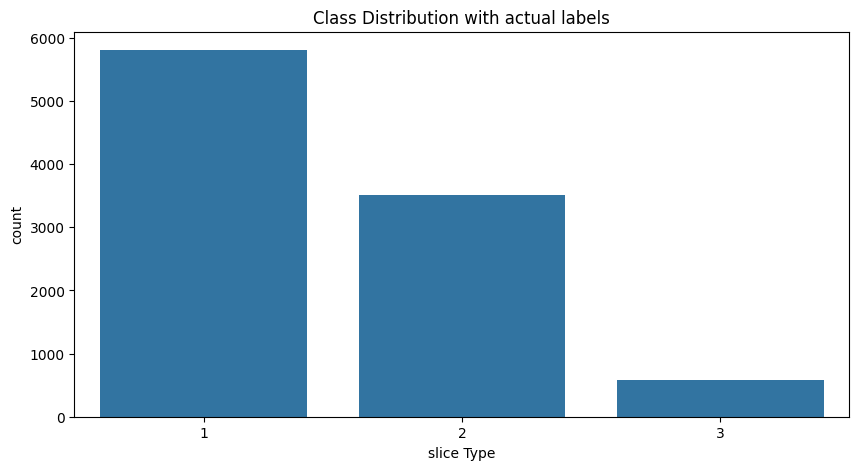

In [5]:
plt.figure(figsize=(10, 5))
sns.countplot(x=data['slice Type'])
plt.title('Class Distribution with actual labels')
plt.show()

#### **Experiment 16 with undersampling**

Activate this section Experiment 16 when willing to perform undersampling before proceeding with the further steps.

In [6]:
# # Identify the majority class
# majority_class = data['slice Type'].value_counts().idxmax()

# # Count the number of data points in the majority class
# majority_count = data['slice Type'].value_counts()[majority_class]

# # Count the number of data points in the other two classes
# minority_count = data['slice Type'].value_counts().min()

# # Calculate the number of data points to remove from the majority class
# num_to_remove = majority_count - minority_count

# # Randomly select data points from the majority class to remove
# majority_indices = data[data['slice Type'] == majority_class].index
# remove_indices = np.random.choice(majority_indices, size=num_to_remove, replace=False)
# print(remove_indices[:100])

# # Remove the selected data points from the DataFrame
# balanced_data = data.drop(remove_indices)

In [7]:
# data = balanced_data
# data.head()

In [8]:
# plt.figure(figsize=(8, 5))
# sns.countplot(x=data['slice Type'])
# plt.title('Balanced Class Distribution with actual labels')
# plt.show()

### **Define X and y**

In [9]:
X = data.drop(columns=['slice Type'])
X

,X,Seq,Dur,RunTime,Mean,Sum,Min,Max,sTos,dTos,...,SrcRate,DstRate,SrcWin,DstWin,SrcTCPBase,DstTCPBase,TcpRtt,SynAck,AckDat,UniqueID
0,34393.000000,24.000000,0.133023,0.133023,0.133023,0.133023,0.133023,0.133023,0.0,0.0,...,30.069990,30.069990,1635.0,879.0,3.278968e+09,4.135953e+09,0.000000,0.000000,0.000000,2.475470e+05
1,727022.000000,250.000000,0.001092,0.001092,0.001092,0.001092,0.001092,0.001092,0.0,0.0,...,0.000000,0.000000,68096.0,31104.0,6.108380e+08,1.659091e+09,0.079877,0.041040,0.038837,3.501310e+05
2,693697.000000,1959.000000,0.014081,0.014081,0.014081,0.014081,0.014081,0.014081,0.0,0.0,...,142.035370,71.017685,97792.0,31104.0,3.649189e+09,1.482432e+09,0.012972,0.000953,0.012019,1.003190e+05
3,22844.000000,14.000000,0.132893,0.132893,0.132893,0.132893,0.132893,0.132893,0.0,0.0,...,30.099403,30.099403,1751.0,947.0,1.882601e+08,4.396569e+08,0.000000,0.000000,0.000000,2.314970e+05
4,36309.000000,7.000000,3.521330,3.521330,3.521330,3.521330,3.521330,3.521330,0.0,0.0,...,5.111705,7.099590,4094.0,5549.0,1.094324e+09,3.441728e+09,0.000000,0.000000,0.000000,1.976550e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9895,455292.377185,281.829734,3.620188,3.961441,3.642492,4.080528,3.689328,3.684907,0.0,0.0,...,2.019412,1.594339,64256.0,64896.0,1.202037e+09,1.485176e+08,0.595314,0.723920,0.032170,2.373585e+06
9896,455262.025767,298.318232,4.376486,2.966175,3.594366,3.873222,3.280655,3.083385,0.0,0.0,...,2.029394,1.400239,64256.0,64896.0,1.202037e+09,1.485176e+08,0.652207,0.874332,0.028468,2.367298e+06
9897,455286.246951,293.324452,3.818366,3.667252,4.340313,4.514485,3.882577,4.103266,0.0,0.0,...,2.037339,1.626468,64256.0,64896.0,1.202037e+09,1.485176e+08,0.876566,0.250007,0.041358,2.383580e+06
9898,455211.102576,171.202752,4.414447,4.101491,4.156414,4.301263,4.173065,4.550792,0.0,0.0,...,1.797084,1.408035,64256.0,64896.0,1.202037e+09,1.485176e+08,0.547553,0.645027,0.027258,2.384146e+06


In [10]:
features = X.columns.tolist()
features
print(len(features))

43


In [11]:
y = data['slice Type']
y

0       3
1       3
2       3
3       3
4       3
       ..
9895    2
9896    2
9897    2
9898    2
9899    2
Name: slice Type, Length: 9900, dtype: int64

In [12]:
np.unique(y)

array([1, 2, 3])

### **Apply t-sne to X**

In [13]:
X_backup = X
X_backup

,X,Seq,Dur,RunTime,Mean,Sum,Min,Max,sTos,dTos,...,SrcRate,DstRate,SrcWin,DstWin,SrcTCPBase,DstTCPBase,TcpRtt,SynAck,AckDat,UniqueID
0,34393.000000,24.000000,0.133023,0.133023,0.133023,0.133023,0.133023,0.133023,0.0,0.0,...,30.069990,30.069990,1635.0,879.0,3.278968e+09,4.135953e+09,0.000000,0.000000,0.000000,2.475470e+05
1,727022.000000,250.000000,0.001092,0.001092,0.001092,0.001092,0.001092,0.001092,0.0,0.0,...,0.000000,0.000000,68096.0,31104.0,6.108380e+08,1.659091e+09,0.079877,0.041040,0.038837,3.501310e+05
2,693697.000000,1959.000000,0.014081,0.014081,0.014081,0.014081,0.014081,0.014081,0.0,0.0,...,142.035370,71.017685,97792.0,31104.0,3.649189e+09,1.482432e+09,0.012972,0.000953,0.012019,1.003190e+05
3,22844.000000,14.000000,0.132893,0.132893,0.132893,0.132893,0.132893,0.132893,0.0,0.0,...,30.099403,30.099403,1751.0,947.0,1.882601e+08,4.396569e+08,0.000000,0.000000,0.000000,2.314970e+05
4,36309.000000,7.000000,3.521330,3.521330,3.521330,3.521330,3.521330,3.521330,0.0,0.0,...,5.111705,7.099590,4094.0,5549.0,1.094324e+09,3.441728e+09,0.000000,0.000000,0.000000,1.976550e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9895,455292.377185,281.829734,3.620188,3.961441,3.642492,4.080528,3.689328,3.684907,0.0,0.0,...,2.019412,1.594339,64256.0,64896.0,1.202037e+09,1.485176e+08,0.595314,0.723920,0.032170,2.373585e+06
9896,455262.025767,298.318232,4.376486,2.966175,3.594366,3.873222,3.280655,3.083385,0.0,0.0,...,2.029394,1.400239,64256.0,64896.0,1.202037e+09,1.485176e+08,0.652207,0.874332,0.028468,2.367298e+06
9897,455286.246951,293.324452,3.818366,3.667252,4.340313,4.514485,3.882577,4.103266,0.0,0.0,...,2.037339,1.626468,64256.0,64896.0,1.202037e+09,1.485176e+08,0.876566,0.250007,0.041358,2.383580e+06
9898,455211.102576,171.202752,4.414447,4.101491,4.156414,4.301263,4.173065,4.550792,0.0,0.0,...,1.797084,1.408035,64256.0,64896.0,1.202037e+09,1.485176e+08,0.547553,0.645027,0.027258,2.384146e+06


In [14]:
tsne = TSNE(n_components=2, random_state=42)  # Reduce to 2 dimensions
X_tsne = tsne.fit_transform(X)
X_tsne

array([[-43.343292  ,  69.70497   ],
       [ 40.87097   , -28.573046  ],
       [ 18.686598  ,  78.52902   ],
       ...,
       [ 93.77926   ,  -1.3721609 ],
       [ 94.41621   ,  -0.74245375],
       [ 95.88563   ,  -2.7426112 ]], dtype=float32)

In [15]:
X = pd.DataFrame({'Feature1': X_tsne[:, 0], 'Feature2': X_tsne[:, 1]})
X

,Feature1,Feature2
0,-43.343292,69.704971
1,40.870972,-28.573046
2,18.686598,78.529022
3,56.581673,-52.427013
4,-28.065020,-29.504000
...,...,...
9895,93.978584,-1.741190
9896,94.948692,-1.765687
9897,93.779259,-1.372161
9898,94.416206,-0.742454


In [16]:
data = pd.DataFrame({'Feature1': X_tsne[:, 0], 'Feature2': X_tsne[:, 1], 'slice Type': y})
data

,Feature1,Feature2,slice Type
0,-43.343292,69.704971,3
1,40.870972,-28.573046,3
2,18.686598,78.529022,3
3,56.581673,-52.427013,3
4,-28.065020,-29.504000,3
...,...,...,...
9895,93.978584,-1.741190,2
9896,94.948692,-1.765687,2
9897,93.779259,-1.372161,2
9898,94.416206,-0.742454,2


In [17]:
features = ['Feature1', 'Feature2']
features

['Feature1', 'Feature2']

### **Ground Truth Calculation**

#### **Ground Truth Slice 1**

In [18]:
# Group data by label "slice 1"
grouped_data_slice1 = data[data['slice Type'] == 1]
grouped_data_slice1

,Feature1,Feature2,slice Type
888,34.054676,3.683022,1
889,16.995920,-78.394463,1
890,33.896927,-33.829998,1
891,31.552677,-12.970806,1
892,9.998902,30.386909,1
...,...,...,...
6691,-7.061157,80.932922,1
6692,-0.763929,80.370682,1
6693,-21.293991,85.062927,1
6694,-4.439217,80.696106,1


In [19]:
# Create 14-dimensional vectors
grouped_data_slice1_vec = grouped_data_slice1[features].values
grouped_data_slice1_vec

array([[ 34.054676,   3.683022],
       [ 16.99592 , -78.39446 ],
       [ 33.896927, -33.829998],
       ...,
       [-21.293991,  85.06293 ],
       [ -4.439217,  80.696106],
       [-34.693596,  85.950424]], dtype=float32)

In [20]:
# Calculate Average
GT_slice1 = np.mean(grouped_data_slice1_vec, axis=0)
GT_slice1

array([3.0778768, 6.41925  ], dtype=float32)

#### **Ground Truth Slice 2**

In [21]:
# Group data by label "slice 2"
grouped_data_slice2 = data[data['slice Type'] == 2]
grouped_data_slice2

,Feature1,Feature2,slice Type
577,9.180326,-14.269867,2
578,9.220108,8.108330,2
579,43.806629,76.233231,2
580,-19.546209,50.711258,2
581,-39.680641,-19.190624,2
...,...,...,...
9895,93.978584,-1.741190,2
9896,94.948692,-1.765687,2
9897,93.779259,-1.372161,2
9898,94.416206,-0.742454,2


In [22]:
# Create 14-dimensional vectors
grouped_data_slice2_vec = grouped_data_slice2[features].values
grouped_data_slice2_vec

array([[  9.180326  , -14.269867  ],
       [  9.220108  ,   8.10833   ],
       [ 43.80663   ,  76.23323   ],
       ...,
       [ 93.77926   ,  -1.3721609 ],
       [ 94.41621   ,  -0.74245375],
       [ 95.88563   ,  -2.7426112 ]], dtype=float32)

In [23]:
# Calculate Average
GT_slice2 = np.mean(grouped_data_slice2_vec, axis=0)
GT_slice2

array([ -6.366246, -10.778919], dtype=float32)

#### **Ground Truth Slice 3**

In [24]:
# Group data by label "slice 3"
grouped_data_slice3 = data[data['slice Type'] == 3]
grouped_data_slice3

,Feature1,Feature2,slice Type
0,-43.343292,69.704971,3
1,40.870972,-28.573046,3
2,18.686598,78.529022,3
3,56.581673,-52.427013,3
4,-28.065020,-29.504000,3
...,...,...,...
572,31.633165,-55.938206,3
573,15.453010,84.364120,3
574,25.328833,-78.158783,3
575,57.207237,53.537716,3


In [25]:
# Create 14-dimensional vectors
grouped_data_slice3_vec = grouped_data_slice3[features].values
grouped_data_slice3_vec

array([[-43.343292,  69.70497 ],
       [ 40.87097 , -28.573046],
       [ 18.686598,  78.52902 ],
       ...,
       [ 25.328833, -78.15878 ],
       [ 57.207237,  53.537716],
       [-24.245218, -82.20431 ]], dtype=float32)

In [26]:
# Calculate Average
GT_slice3 = np.mean(grouped_data_slice3_vec, axis=0)
GT_slice3

array([12.981321, 10.704549], dtype=float32)

#### **Plot Ground Truth**

In [27]:
# Combine the centroids into a single array
GT_centroids = np.vstack((GT_slice1, GT_slice2, GT_slice3))
GT_centroids

array([[  3.0778768,   6.41925  ],
       [ -6.366246 , -10.778919 ],
       [ 12.981321 ,  10.704549 ]], dtype=float32)

In [28]:
# # Apply PCA to reduce the dimensionality to 3 dimensions
# pca = PCA(n_components=3)
# centroids_3d = pca.fit_transform(GT_centroids)
# centroids_3d

In [29]:
# # Plot the centroids in 3D space
# fig = plt.figure(figsize=(14, 8))
# ax = fig.add_subplot(111, projection='3d')

# ax.scatter(centroids_3d[:, 0], centroids_3d[:, 1], centroids_3d[:, 2], c='r', marker='o')

# ax.set_xlabel('Principal Component 1')
# ax.set_ylabel('Principal Component 2')
# ax.set_zlabel('Principal Component 3')

# plt.title('Ground Truth Centroids (3D)')
# plt.show()

### **Datasplit - X, X_train and X_test**

In [30]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=42)
X_train

,Feature1,Feature2
9789,39.441780,48.747818
7263,5.270911,15.974469
2932,60.179085,-19.802868
9786,39.499672,48.439342
2270,61.726826,-13.778096
...,...,...
5734,-21.093616,25.942503
5191,86.076599,32.056145
5390,50.131584,17.523788
860,13.014835,-62.323616


In [31]:
X_test

,Feature1,Feature2
8432,49.331264,-47.062950
5680,-29.174725,42.291153
4767,-60.500854,-14.580714
9218,22.489794,58.405891
621,-29.496178,-75.964035
...,...,...
8640,34.421215,-49.113358
9155,5.295516,-69.037064
594,-30.056175,-37.669708
5563,-33.076588,44.456516


In [32]:
y_train

9789    2
7263    2
2932    1
9786    2
2270    1
       ..
5734    1
5191    1
5390    1
860     2
7270    2
Name: slice Type, Length: 8910, dtype: int64

In [33]:
y_test

8432    2
5680    1
4767    1
9218    2
621     2
       ..
8640    2
9155    2
594     2
5563    1
3434    1
Name: slice Type, Length: 990, dtype: int64

# **EDA**

## Pair Plots

In [ ]:
# sns.pairplot(X)
# plt.suptitle('Pairwise Scatter Plots', y=1.02)
# plt.show()

In [ ]:
# sns.pairplot(X_tsne)
# plt.suptitle('Pairwise Scatter Plots', y=1.02)
# plt.show()

## Heatmaps

In [ ]:
# # Create a heatmap for the correlation matrix of all features
# plt.figure(figsize=(14, 8))
# sns.heatmap(X_train.corr(), annot=True, annot_kws={"size": 8})
# plt.title('Heatmap (Feature Distribution)')
# plt.show()

# **Data Modelling and Analysis**

## **Model Training**

In [34]:
# Create a KMeans model
kmeans_model = KMeans(n_clusters=3, random_state=42)

# Fit the model to the training data
best_model = kmeans_model.fit(X_train)
best_model

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

## **Hyperparameter Tuning**

In [ ]:
# # Initialize KMeans model
# kmeans = KMeans()

# # Define hyperparameters to tune
# param_grid = {
#     'init': ['k-means++', 'random'],
#     'n_clusters': [3],
#     'max_iter': [50, 100, 200, 300],
#     # 'tol': [1e-2, 1e-3, 1e-4, 1e-5, 1e-6],
#     # 'tol': [1e-6],
#     'algorithm': ['auto', 'full'],
#     # 'n_jobs': [-1],  # Use all available CPU cores
#     'random_state': [42]
# }

# # Perform GridSearchCV for hyperparameter tuning
# grid_search = GridSearchCV(kmeans, param_grid, cv=10, scoring='neg_mean_squared_error')
# grid_search.fit(X_train)

# # Get best hyperparameters and model
# best_params = grid_search.best_params_
# best_model = grid_search.best_estimator_

# # Print best hyperparameters
# print("\n\nBest Hyperparameters:")
# print(best_params)

# # Print best model
# print("\nBest Model:")
# best_model

## **Model Labels**

In [35]:
kmeans_model_labels = best_model.labels_
kmeans_model_labels

array([0, 2, 0, ..., 0, 1, 2], dtype=int32)

In [36]:
kmeans_model_labels_aligned = kmeans_model_labels + 1
kmeans_model_labels_aligned

array([1, 3, 1, ..., 1, 2, 3], dtype=int32)

In [37]:
len(kmeans_model_labels_aligned)

8910

In [38]:
np.unique(kmeans_model_labels_aligned)

array([1, 2, 3], dtype=int32)

## **Model Centroids**

In [39]:
kmeans_model_centroids = best_model.cluster_centers_
kmeans_model_centroids

array([[ 50.722416 ,   4.6268992],
       [-19.121288 , -43.96073  ],
       [-27.777822 ,  40.305843 ]], dtype=float32)

In [40]:
C1 = kmeans_model_centroids[0]
C1

array([50.722416 ,  4.6268992], dtype=float32)

In [41]:
C2 = kmeans_model_centroids[1]
C2

array([-19.121288, -43.96073 ], dtype=float32)

In [42]:
C3 = kmeans_model_centroids[2]
C3

array([-27.777822,  40.305843], dtype=float32)

## **Initialization of an empty array before Centroid Mapping based on Ground Truths**

In [43]:
feature_lists = [features, features, features]
feature_lists

[['Feature1', 'Feature2'], ['Feature1', 'Feature2'], ['Feature1', 'Feature2']]

In [44]:
len(features)

2

In [45]:
# Determine the number of columns (max length of feature lists)
num_columns = max(len(feature_list) for feature_list in feature_lists)
num_columns

2

In [46]:
# Create an empty NumPy array with 3 rows and num_columns columns, filled with 0.0
arr = np.zeros((3, num_columns)).astype(np.float32)
print(arr)
print(arr.dtype)

[[0. 0.]
 [0. 0.]
 [0. 0.]]
float32


## **Minimum Distance of C1 from Ground Truths**

In [47]:
dist_C1_GT_slice1 = np.linalg.norm(C1 - GT_slice1)
dist_C1_GT_slice1

47.67824

In [48]:
dist_C1_GT_slice2 = np.linalg.norm(C1 - GT_slice2)
dist_C1_GT_slice2

59.130825

In [49]:
dist_C1_GT_slice3 = np.linalg.norm(C1 - GT_slice3)
dist_C1_GT_slice3

38.22732

In [50]:
# Determine the closest centroid
min_dist_C1 = min(dist_C1_GT_slice1, dist_C1_GT_slice2, dist_C1_GT_slice3)

if min_dist_C1 == dist_C1_GT_slice1:
    closest_centroid_C1 = "Slice 1"
    arr[0] = C1
elif min_dist_C1 == dist_C1_GT_slice2:
    closest_centroid_C1 = "Slice 2"
    arr[0] = C2
else:
    closest_centroid_C1 = "Slice 3"
    arr[0] = C3

print("C1 has minimum distance of ", min_dist_C1, "from the Model's Centroid/Cluster", closest_centroid_C1)
arr

C1 has minimum distance of  38.22732 from the Model's Centroid/Cluster Slice 3


array([[-27.777822,  40.305843],
       [  0.      ,   0.      ],
       [  0.      ,   0.      ]], dtype=float32)

## **Minimum Distance of C2 from Ground Truths**

In [51]:
dist_C2_GT_slice1 = np.linalg.norm(C2 - GT_slice1)
dist_C2_GT_slice1

55.054024

In [52]:
dist_C2_GT_slice2 = np.linalg.norm(C2 - GT_slice2)
dist_C2_GT_slice2

35.548893

In [53]:
dist_C2_GT_slice3 = np.linalg.norm(C2 - GT_slice3)
dist_C2_GT_slice3

63.394558

In [54]:
# Determine the closest centroid
min_dist_C2 = min(dist_C2_GT_slice1, dist_C2_GT_slice2, dist_C2_GT_slice3)

if min_dist_C2 == dist_C2_GT_slice1:
    closest_centroid_C2 = "Slice 1"
    arr[1] = C1
elif min_dist_C2 == dist_C2_GT_slice2:
    closest_centroid_C2 = "Slice 2"
    arr[1] = C2
else:
    closest_centroid_C2 = "Slice 3"
    arr[1] = C3

print("C2 has minimum distance of ", min_dist_C2, "from the Model's Centroid/Cluster", closest_centroid_C2)
arr

C2 has minimum distance of  35.548893 from the Model's Centroid/Cluster Slice 2


array([[-27.777822,  40.305843],
       [-19.121288, -43.96073 ],
       [  0.      ,   0.      ]], dtype=float32)

## **Minimum Distance of C3 from Ground Truths**

In [55]:
dist_C3_GT_slice1 = np.linalg.norm(C3 - GT_slice1)
dist_C3_GT_slice1

45.829853

In [56]:
dist_C3_GT_slice2 = np.linalg.norm(C3 - GT_slice2)
dist_C3_GT_slice2

55.39051

In [57]:
dist_C3_GT_slice3 = np.linalg.norm(C3 - GT_slice3)
dist_C3_GT_slice3

50.374046

In [58]:
# Determine the closest centroid
min_dist_C3 = min(dist_C3_GT_slice1, dist_C3_GT_slice2, dist_C3_GT_slice3)

if min_dist_C3 == dist_C3_GT_slice1:
    closest_centroid_C3 = "Slice 1"
    arr[2] = C1
elif min_dist_C3 == dist_C3_GT_slice2:
    closest_centroid_C3 = "Slice 2"
    arr[2] = C2
else:
    closest_centroid_C3 = "Slice 3"
    arr[2] = C3

print("C3 has minimum distance of ", min_dist_C3, "from the Model's Centroid/Cluster", closest_centroid_C3)
arr

C3 has minimum distance of  45.829853 from the Model's Centroid/Cluster Slice 1


array([[-27.777822 ,  40.305843 ],
       [-19.121288 , -43.96073  ],
       [ 50.722416 ,   4.6268992]], dtype=float32)

## **Model Centroids Mapping to Labels**

In [59]:
print("C1 has minimum distance of ", min_dist_C1, "from the Model's Centroid/Cluster", closest_centroid_C1)
print("C2 has minimum distance of ", min_dist_C2, "from the Model's Centroid/Cluster", closest_centroid_C2)
print("C3 has minimum distance of ", min_dist_C3, "from the Model's Centroid/Cluster", closest_centroid_C3)

C1 has minimum distance of  38.22732 from the Model's Centroid/Cluster Slice 3
C2 has minimum distance of  35.548893 from the Model's Centroid/Cluster Slice 2
C3 has minimum distance of  45.829853 from the Model's Centroid/Cluster Slice 1


In [60]:
kmeans_model

KMeans(n_clusters=3, random_state=42)

In [61]:
kmeans_model_mod = kmeans_model
kmeans_model_mod

KMeans(n_clusters=3, random_state=42)

In [62]:
kmeans_model_mod.cluster_centers_ = arr

In [63]:
kmeans_model_centroids_mapped = kmeans_model_mod.cluster_centers_
kmeans_model_centroids_mapped

array([[-27.777822 ,  40.305843 ],
       [-19.121288 , -43.96073  ],
       [ 50.722416 ,   4.6268992]], dtype=float32)

## **Model Testing**

In [64]:
# Predict the labels for the test data
# y_pred = kmeans_model.predict(X_test)
y_pred = kmeans_model_mod.predict(X_test)
y_pred

array([2, 0, 1, 0, 1, 0, 0, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 0, 0, 2, 2, 0,
       1, 0, 0, 0, 0, 0, 1, 2, 1, 1, 1, 2, 1, 2, 0, 1, 1, 1, 2, 0, 1, 0,
       1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 0,
       0, 1, 2, 1, 1, 2, 1, 2, 2, 0, 1, 0, 0, 0, 2, 1, 1, 1, 2, 2, 0, 0,
       2, 1, 2, 2, 2, 0, 0, 1, 1, 2, 2, 2, 1, 0, 0, 2, 0, 0, 1, 0, 0, 2,
       2, 1, 1, 2, 1, 0, 2, 1, 2, 2, 0, 1, 2, 0, 1, 0, 1, 2, 2, 2, 0, 2,
       2, 1, 0, 0, 2, 1, 0, 0, 1, 2, 2, 1, 1, 0, 1, 0, 2, 0, 2, 0, 1, 2,
       1, 0, 2, 1, 2, 1, 1, 2, 2, 0, 1, 1, 0, 1, 1, 0, 1, 0, 2, 0, 2, 2,
       0, 2, 0, 2, 1, 1, 0, 0, 2, 2, 1, 1, 0, 2, 1, 1, 2, 0, 2, 2, 1, 2,
       2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 2, 1, 0, 1, 2, 2, 2, 2, 0, 1, 0,
       0, 0, 0, 2, 2, 1, 1, 0, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 0, 1, 1, 2,
       1, 2, 1, 0, 2, 2, 1, 2, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 1, 0, 0, 2,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 2, 0, 2, 0, 0, 0,
       0, 0, 2, 1, 1, 1, 0, 1, 1, 2, 0, 0, 2, 2, 0,

In [65]:
y_pred_aligned = y_pred + 1
y_pred_aligned

array([3, 1, 2, 1, 2, 1, 1, 3, 2, 3, 2, 2, 2, 3, 2, 3, 2, 1, 1, 3, 3, 1,
       2, 1, 1, 1, 1, 1, 2, 3, 2, 2, 2, 3, 2, 3, 1, 2, 2, 2, 3, 1, 2, 1,
       2, 2, 2, 3, 2, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 2, 1,
       1, 2, 3, 2, 2, 3, 2, 3, 3, 1, 2, 1, 1, 1, 3, 2, 2, 2, 3, 3, 1, 1,
       3, 2, 3, 3, 3, 1, 1, 2, 2, 3, 3, 3, 2, 1, 1, 3, 1, 1, 2, 1, 1, 3,
       3, 2, 2, 3, 2, 1, 3, 2, 3, 3, 1, 2, 3, 1, 2, 1, 2, 3, 3, 3, 1, 3,
       3, 2, 1, 1, 3, 2, 1, 1, 2, 3, 3, 2, 2, 1, 2, 1, 3, 1, 3, 1, 2, 3,
       2, 1, 3, 2, 3, 2, 2, 3, 3, 1, 2, 2, 1, 2, 2, 1, 2, 1, 3, 1, 3, 3,
       1, 3, 1, 3, 2, 2, 1, 1, 3, 3, 2, 2, 1, 3, 2, 2, 3, 1, 3, 3, 2, 3,
       3, 1, 3, 1, 1, 1, 1, 1, 3, 1, 3, 3, 2, 1, 2, 3, 3, 3, 3, 1, 2, 1,
       1, 1, 1, 3, 3, 2, 2, 1, 2, 3, 3, 2, 2, 2, 3, 3, 2, 2, 1, 2, 2, 3,
       2, 3, 2, 1, 3, 3, 2, 3, 1, 1, 1, 2, 1, 1, 3, 2, 1, 1, 2, 1, 1, 3,
       2, 2, 2, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 3, 1, 3, 1, 1, 1,
       1, 1, 3, 2, 2, 2, 1, 2, 2, 3, 1, 1, 3, 3, 1,

In [66]:
len(y_pred_aligned)

990

In [67]:
np.unique(y_pred_aligned)

array([1, 2, 3], dtype=int32)

## **Update testing dataset with labels**

In [68]:
# Get the column names from the original DataFrame
X_test_column_names = X_test.columns.tolist()

# Convert X_test to a pandas DataFrame
# X_test_df = pd.DataFrame(X_test, columns=X_test_column_names)

# Create a copy to avoid modifying the original DataFrame
X_test_with_labels = X_test.copy()

# Resetting indices to avoid alignment issues
X_test_with_labels.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
# y_pred.reset_index(drop=True, inplace=True)

actual_label = pd.Series(y_test, name='actual_label')
predicted_label = pd.Series(y_pred_aligned, name='predicted_label')

# Include the 'predicted labels' as a new column in the DataFrame
X_test_with_labels['actual_label'] = actual_label

# Include the 'predicted labels' as a new column in the DataFrame
X_test_with_labels['predicted_label'] = predicted_label

In [69]:
# Display the Updated Table
X_test_with_labels[:20]

,Feature1,Feature2,actual_label,predicted_label
0,49.331264,-47.062950,2,3
1,-29.174725,42.291153,1,1
2,-60.500854,-14.580714,1,2
3,22.489794,58.405891,2,1
4,-29.496178,-75.964035,2,2
5,4.992009,60.373802,1,1
6,29.092785,81.408272,2,1
7,71.252213,-41.004612,1,3
8,-41.839645,-47.569775,2,2
9,95.606216,-2.045695,2,3


## **Predicted Label Analysis**

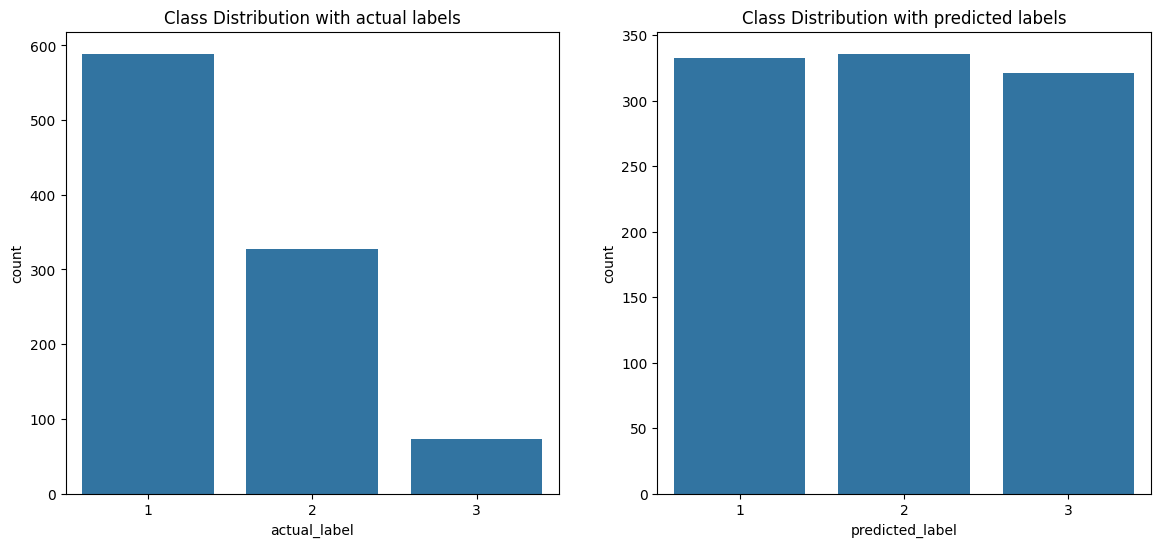

In [75]:
# Class Distribution

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

sns.countplot(x=actual_label, ax=axs[0])
axs[0].set_title('Class Distribution with actual labels')

sns.countplot(x=predicted_label, ax=axs[1])
axs[1].set_title('Class Distribution with predicted labels')

plt.show()

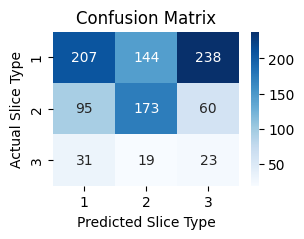

In [73]:
# Confusion Matrix
plt.figure(figsize=(3, 2))
cm = confusion_matrix(actual_label, predicted_label)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(actual_label), yticklabels=np.unique(predicted_label))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Slice Type')
plt.ylabel('Actual Slice Type')
plt.show()

In [74]:
# Calculate accuracy
print("Accuracy", accuracy_score(actual_label, predicted_label))

# Calculate precision
print("Precision", precision_score(actual_label, predicted_label, average='weighted'))

# Calculate recall
print("Recall", recall_score(actual_label, predicted_label, average='weighted'))

# Calculate F1-score
print("F1-score", f1_score(actual_label, predicted_label, average='weighted'))

Accuracy 0.4070707070707071
Precision 0.5457036536475789
Recall 0.4070707070707071
F1-score 0.44839753486881945


In [76]:
conf_matrix = cm
conf_matrix

array([[207, 144, 238],
       [ 95, 173,  60],
       [ 31,  19,  23]])

In [77]:
# True Positives (TP) for each class
TP_class0 = conf_matrix[0, 0]
TP_class1 = conf_matrix[1, 1]
TP_class2 = conf_matrix[2, 2]

# False Positives (FP) for each class
FP_class0 = np.sum(conf_matrix[0, :]) - TP_class0
FP_class1 = np.sum(conf_matrix[1, :]) - TP_class1
FP_class2 = np.sum(conf_matrix[2, :]) - TP_class2

# False Negatives (FN) for each class
FN_class0 = np.sum(conf_matrix[:, 0]) - TP_class0
FN_class1 = np.sum(conf_matrix[:, 1]) - TP_class1
FN_class2 = np.sum(conf_matrix[:, 2]) - TP_class2

# True Negatives (TN) for each class
TN_class0 = np.sum(conf_matrix) - TP_class0 - FP_class0 - FN_class0
TN_class1 = np.sum(conf_matrix) - TP_class1 - FP_class1 - FN_class1
TN_class2 = np.sum(conf_matrix) - TP_class2 - FP_class2 - FN_class2

# Overall True Positives (TP), True Negatives (TN), False Positives (FP), False Negatives (FN)
TP = TP_class0 + TP_class1 + TP_class2
FP = FP_class0 + FP_class1 + FP_class2
FN = FN_class0 + FN_class1 + FN_class2
TN = TN_class0 + TN_class1 + TN_class2

# Display the values
print("True Positives (TP):", TP)
print("False Positives (FP):", FP)
print("False Negatives (FN):", FN)
print("True Negatives (TN):", TN)

True Positives (TP): 403
False Positives (FP): 587
False Negatives (FN): 587
True Negatives (TN): 1393


In [78]:
acc = (TP + TN)/(TP + TN + FP + FN)
pres = TP/(TP + FP)
rec = TP/(TP + FN)
f1 = 2 * ((pres * rec)/(pres + rec))
print("Accuracy", acc)
print("Precision", pres)
print("Recall", rec)
print("F1-score", f1)

Accuracy 0.6047138047138048
Precision 0.4070707070707071
Recall 0.4070707070707071
F1-score 0.407070707070707


# **SYNC NOTEBOOKS**

In [ ]:
%cp '/content/drive/MyDrive/Colab Notebooks/Exp14 & 16 - Slice_Identification_UnSupML_tsne.ipynb' '/content/drive/MyDrive/Network_Slicing_with_ML_repo/Network-Slicing-with-ML/Notebooks/'